In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
map = gpd.read_file('../data/AgrImOnIa/raw/AreasGeometriesWithNames.shp')
map = map.to_crs({'init': 'epsg:4326'})

map.head()

C:\Users\camil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,field_1,MUNICIPALI,geometry
0,0,SQ125,"MULTIPOLYGON (((8.49986 45.29747, 8.50000 45.2..."
1,1,SQ145,"POLYGON ((8.58701 45.91764, 8.60000 45.92665, ..."
2,2,SQ146,"POLYGON ((8.55595 45.80004, 8.55610 45.80018, ..."
3,3,SQ147,"POLYGON ((8.59977 45.72737, 8.59848 45.72778, ..."
4,4,SQ151,"POLYGON ((8.50331 45.30019, 8.50634 45.30259, ..."


In [15]:
input_file_name = "../data/formated_input_data.csv"
input_data = gpd.read_file(input_file_name)
input_data.head()

# Replace in all names ' for `
input_data['Municipality_Name'] = input_data['Municipality_Name'].str.replace('\'', '`')

In [16]:
geometry_cols = map[["MUNICIPALI", "geometry"]]
merged_df = pd.merge(input_data, geometry_cols, left_on="Municipality_Name", right_on="MUNICIPALI", how="inner")
merged_df.drop(["MUNICIPALI", "geometry_x"], axis=1, inplace=True)
merged_df.rename(columns={"geometry_y": "geometry"}, inplace=True)

# shift back the predictions by the initial value
mean_shift = pd.to_numeric(merged_df["PM25_original"], errors="coerce").mean()

merged_df.head()

,PM25_original,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,Municipality_Name,geometry
0,NA,118.268634567261,16.6309883636364,1.61493527272727,2.71659636363636,0.00452893236145455,100147.6,12348204,54.8889454545455,74.2201090909091,...,2.69014181818182,3.47471272727273,0.266965236363636,0.00611319636363636,0.985159636363636,4.83646181818182,1.73258290909091,213,SQ125,"MULTIPOLYGON (((8.49986 45.29747, 8.50000 45.2..."
1,NA,432.649012009201,12.9399722082499,0.90721348457203,1.50879763370425,0.00908009725104725,92951.6260036909,12547160.1286852,60.2583312382625,76.5110052048377,...,2.78092484207753,4.91784089137298,1.5563429271417,0.188672876797136,1.60860605340706,2.82149428226814,2.98911914131441,311.075551219343,SQ145,"POLYGON ((8.58701 45.91764, 8.60000 45.92665, ..."
2,NA,372.924352598461,14.5149607590573,0.992413912005343,1.65049527039727,0.00838975277431209,95728.6763224323,12801821.7845427,59.5918215630273,75.7027746707123,...,3.17108777989514,4.76561685718683,1.53021989220633,0.0846887347092718,6.49933140951302,2.81109846091968,3.03518543435384,511.958032024435,SQ146,"POLYGON ((8.55595 45.80004, 8.55610 45.80018, ..."
3,NA,284.352324066162,14.9172596363636,1.16658218181818,1.92424618181818,0.00731296969381818,96629.3090909091,12607434.1818182,58.5844,75.1148363636364,...,4.38884,6.06987636363636,0.957388,0.674931272727273,12.0835272727273,2.57117454545455,3.00033818181818,112,SQ147,"POLYGON ((8.59977 45.72737, 8.59848 45.72778, ..."
4,NA,126.652377503471,16.4771524579229,1.71471997568135,2.89546612732632,0.00487007736070356,99803.5349526715,12300743.3847828,54.8359509258155,74.2569375188496,...,0.7292930886056,1.60017355470963,0.29339656943881,6.22014672471772,8.03779160992706,4.56259590439271,1.82700390499252,213,SQ151,"POLYGON ((8.50331 45.30019, 8.50634 45.30259, ..."


<Axes: >

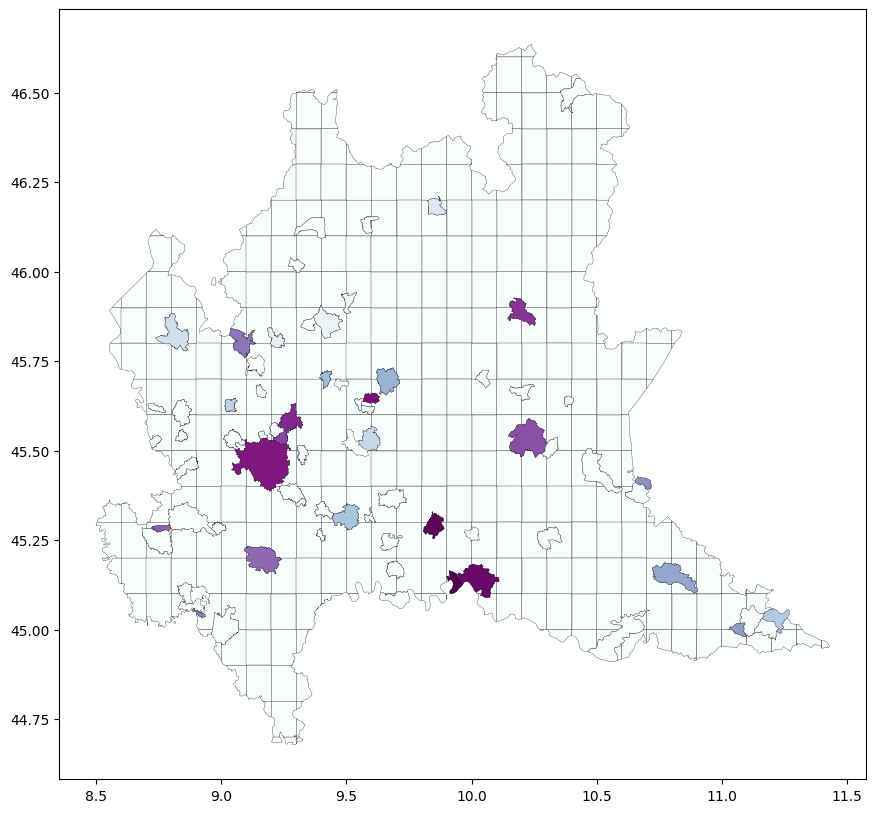

In [17]:
merged_df = merged_df.to_crs(map.crs)
cleaned_df = merged_df
cleaned_df["PM25_original"].replace("NA", 0, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))

cleaned_df.plot(
    ax=ax, 
    column="PM25_original", 
    cmap="BuPu", 
    edgecolor='black', 
    linewidth=0.2
)

<Axes: >

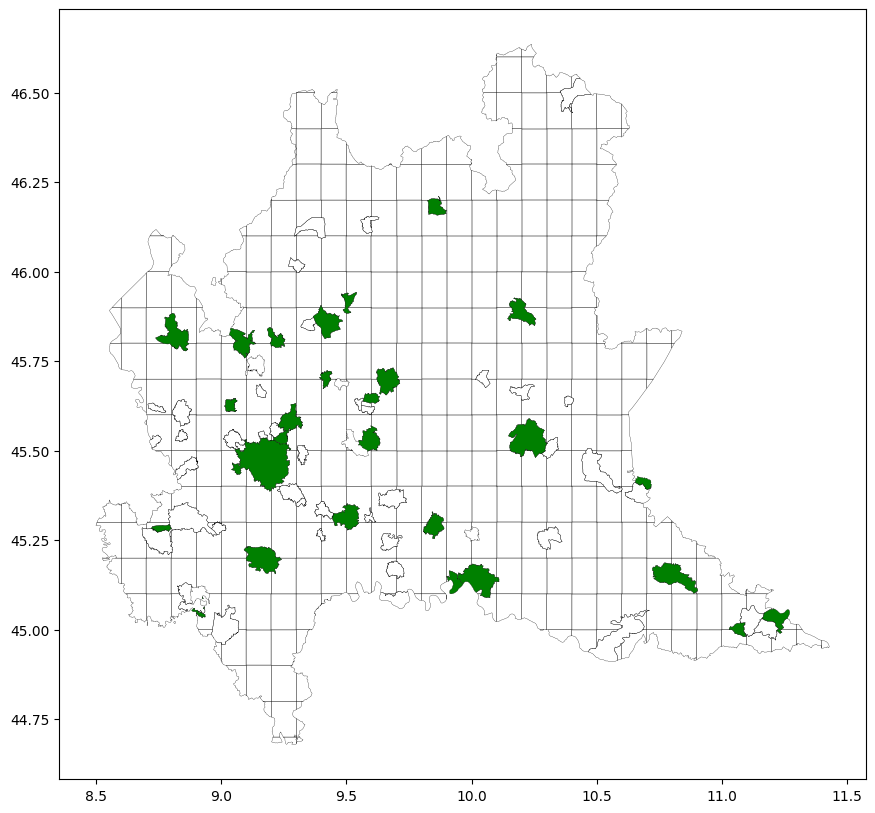

In [18]:
# Create a new column for color
cleaned_df['color'] = np.where(cleaned_df['PM25_original'] != 0, 'green', 'none')

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the data
cleaned_df.plot(
    ax=ax, 
    color=cleaned_df['color'], 
    edgecolor='black', 
    linewidth=0.2
)